# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random as rd
import pandas as pd
from scipy.stats import expon
from scipy.stats import uniform
import math

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.86950107 2.33321047 2.56891223 2.55550732 2.22385378 2.29743782
 2.03816268 2.17099085 2.68961415 2.76684066]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [3]:
def conjunto_aleatorio_uniforme (bottom, ceiling, count):
    return bottom + (ceiling - bottom)*uniform.rvs (size=count)

In [4]:
primero=conjunto_aleatorio_uniforme (10,15,100)
segundo=conjunto_aleatorio_uniforme (10,60,1000)

<AxesSubplot:ylabel='Count'>

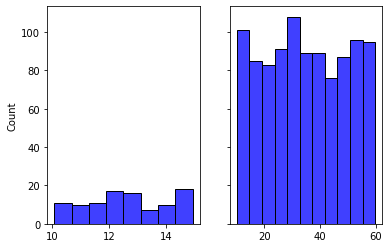

In [5]:
fig, ax = plt.subplots(1,2,sharey=True )
sns.histplot(primero, color="b", ax=ax[0])
sns.histplot(segundo, color="b", ax=ax[1])


How are the two distributions different?

* Las distribuciones son parecidas, uniformes.
* La horquilla es mucho más amplia en el segundo caso, con una distancia a la media desde los extremos de 25, frente a 2.5 en el primer caso

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

El método gauss() de random nos devuelve 1 valor gaussiano con la media y la desviación estándar que le demos, por otro lado también está el método random.gauss de math, que nos devuelve una lista del tamaño que le demos con una media de 0 y desviación de 1. Elijo el primero y le doy el tamaño con una list comprehension, que nunca las utilizo y aquí más sencilla no puede ser.

In [6]:
tercero= [rd.gauss (10,1) for i in range (1000)]
cuarto= [rd.gauss (10,50) for i in range (1000)]
    
    

<AxesSubplot:ylabel='Count'>

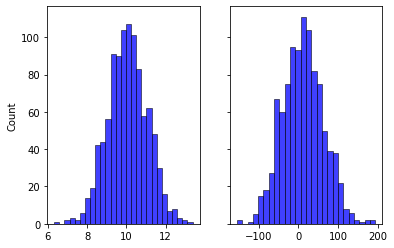

In [7]:
fig, ax = plt.subplots(1,2,sharey=True )
sns.histplot(tercero, color="b", ax=ax[0])
sns.histplot(cuarto, color="b", ax=ax[1])

How are the two distributions different?

<AxesSubplot:ylabel='Count'>

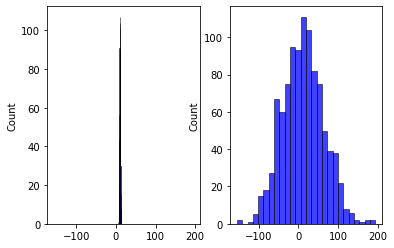

In [8]:
fig, ax = plt.subplots(1,2,sharex=True )
sns.histplot(tercero, color="b", ax=ax[0])
sns.histplot(cuarto, color="b", ax=ax[1])

Aparentemente iguales, pero con el rango en la x mucho mas amplio en el segundo caso.Por eso ploteo la ultima imagen, con una muestra igual de tamaño, vemos claramente las diferencias.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [9]:
df= pd.read_csv ("vehicles.csv")

<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='Count'>

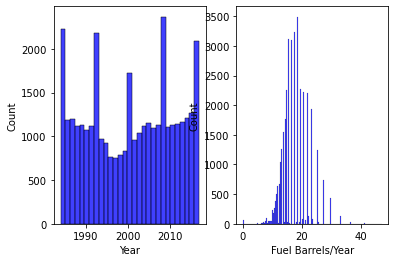

In [10]:
fig, ax = plt.subplots(1,2)
sns.histplot(df["Year"], color="b", ax=ax[0])
sns.histplot(df["Fuel Barrels/Year"], color="b", ax=ax[1])


2. CO2 Emission Grams/Mile 

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='Count'>

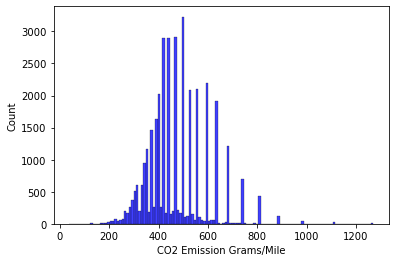

In [11]:
sns.histplot(df["CO2 Emission Grams/Mile"], color="b")


3. Combined MPG

<AxesSubplot:xlabel='Combined MPG', ylabel='Count'>

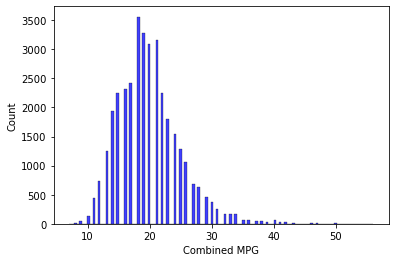

In [12]:
sns.histplot(df["Combined MPG"], color="b")

Which one(s) of the variables are nearly normally distributed? How do you know?

La verdad que salvo "Year", todas son bastante parecidas con cierto sesgo positivo, más marcado en las dos últimas gráficas. El sesgo menos marcado parece el de barriles al año, que a ojo parece que tiene una media 17-19, con desviación estándar de 16-18. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

En la documentación avisan de un nuevo método para sustiturlo, "random.sampling), pero la verdad que no conseguido aplicarlo. así que vamos con  el propuesto: incluyo la media como parámetro para que quede más completa.

In [13]:
def mas_listas_de_numeros (media, tamaño): 
    return [np.random.exponential(media) for n in range (0,tamaño)]

In [14]:
quinta=mas_listas_de_numeros (10, 10)
sexta=mas_listas_de_numeros (10, 100)

<AxesSubplot:ylabel='Count'>

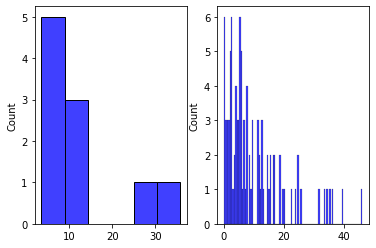

In [15]:
fig, ax = plt.subplots(1,2)
sns.histplot(quinta, color="b", ax=ax[0])
sns.histplot(sexta, color="b", ax=ax[1], bins=100)


How are the two distributions different?

Son iguales, pero con mayor muestra en el segundo caso. Al tener que tomar valores positivos, siempre tenderá a ser mayor en el 0 e ir disminuyendo la cantidad de repeticiones hasta el ultimo valor. Si aumentamos las muestras se aprecia mejor:

In [16]:
septima=mas_listas_de_numeros (10, 100)
octava=mas_listas_de_numeros (10, 10000)

<AxesSubplot:ylabel='Count'>

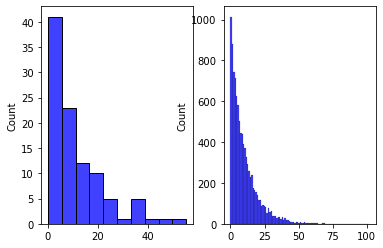

In [17]:
fig, ax = plt.subplots(1,2)
sns.histplot(septima, color="b", ax=ax[0])
sns.histplot(octava, color="b", ax=ax[1], bins=100)

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

$$F(x)=1 - e^ {-\lambda x}$$


Cambiamos valores y calculamos:

In [18]:
1 - math.e **(-0.1*15)

0.7768698398515701

Y comprobamos:

In [19]:
exp_time = expon (scale=10)

In [20]:
exp_time.cdf (15)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

Como tenemos las probabilidades de pase al menos 15 min, sencillamente es restar a 1 esas probabilidades:

In [21]:
1 - exp_time.cdf(15)

0.2231301601484298